In [77]:
import pandas as pd
import plotly.express as px
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.cluster as cl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
recruitmentDf = pd.read_csv('Recruitment_db.csv').drop(columns=['userid'])
# Convert dates
recruitmentDf['date.entretien'] = pd.to_datetime(recruitmentDf['date.entretien'])
recruitmentDf['date.signature'] = pd.to_datetime(recruitmentDf['date.signature'])
recruitmentDf["date.delta"] = recruitmentDf["date.signature"] - recruitmentDf["date.entretien"]
recruitmentDf["date.delta.days"] = recruitmentDf["date.delta"].dt.days

# Drop impossible entries
recruitmentDf = recruitmentDf.drop(recruitmentDf[recruitmentDf["date.delta"] < pd.Timedelta(0)].index)

# Compute the rapidty of onboardings
recruitmentDf["rap.score"] = recruitmentDf[["ajout.mail.rap", "crea.compte.rap", "obten.ordi.rap", "reu.equip.rap"]].sum(axis=1)

recruitmentDf

,date.entretien,date.signature,ajout.mail.rap,crea.compte.rap,obten.ordi.rap,reu.equip.rap,score.satisf.onb,n.emails,n.meetings,date.delta,date.delta.days,rap.score
0,2011-09-17,2011-10-07,0,0,0,0,1.495834,11,6,20 days,20,0
1,2017-01-17,2017-01-31,0,0,0,1,8.946863,56,6,14 days,14,1
2,2019-05-14,2019-06-17,0,0,0,1,2.496199,13,4,34 days,34,1
3,2015-11-27,2016-01-15,0,0,0,1,2.823579,32,2,49 days,49,1
4,2014-11-28,2015-01-15,0,1,0,0,2.117433,21,4,48 days,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2014-09-08,2014-11-04,0,1,0,0,0.911377,7,3,57 days,57,1
2996,2012-07-08,2012-08-19,0,1,0,0,1.704222,17,2,42 days,42,1
2997,2009-10-25,2009-11-15,0,0,0,0,3.998883,36,5,21 days,21,0
2998,2015-09-23,2015-10-30,0,0,0,0,3.204676,29,2,37 days,37,0


In [60]:
recruitmentDf["score.satisf.onb"].describe()

count    2989.000000
mean        1.952345
std         1.080310
min         0.295011
25%         1.134998
50%         1.710141
75%         2.513288
max         8.946863
Name: score.satisf.onb, dtype: float64

<AxesSubplot:ylabel='Density'>

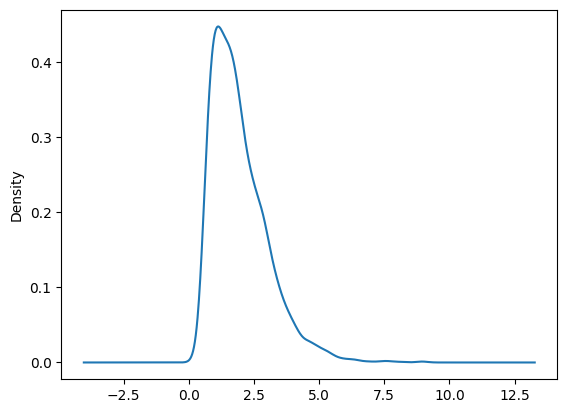

In [66]:
recruitmentDf["score.satisf.onb"].plot.density()

<AxesSubplot:>

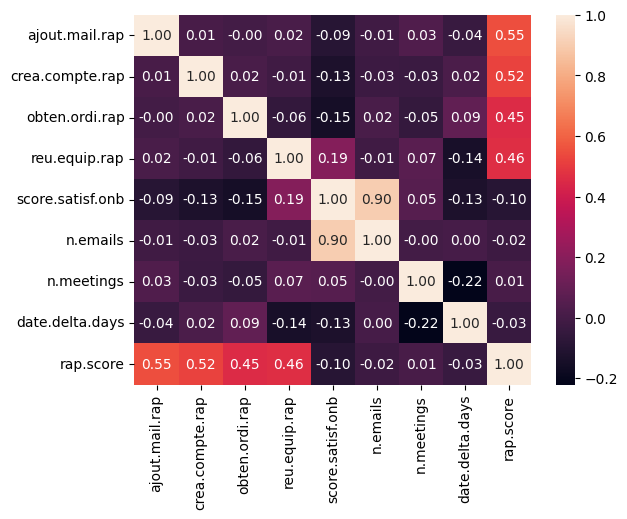

In [91]:
sns.heatmap(recruitmentDf.corr(), annot=True, fmt='.2f')

In [3]:
px.bar(x = recruitmentDf["n.emails"].value_counts().index, y = recruitmentDf["n.emails"].value_counts().values, color= recruitmentDf.groupby("n.emails")["score.satisf.onb"].mean(),labels = {"x": "Number of emails", "y": "Number of candidates"})

In [70]:
px.scatter(recruitmentDf, x="n.emails", y="score.satisf.onb", trendline="ols", labels = {"x": "Number of emails", "y": "Satisfaction score"})

In [4]:
px.bar(x = recruitmentDf["n.meetings"].value_counts().index, y = recruitmentDf["n.meetings"].value_counts().values, color= recruitmentDf.groupby("n.meetings")["score.satisf.onb"].mean(),labels = {"x": "Number of meetings", "y": "Number of candidates"})

In [5]:
# Linear model with the number of emails and the number of meetings to explain the satisfaction score
model = sm.OLS(recruitmentDf["score.satisf.onb"], recruitmentDf[["n.emails", "n.meetings"]]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       score.satisf.onb   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          3.269e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                        0.00
Time:                        10:45:47   Log-Likelihood:                         -1961.4
No. Observations:                2989   AIC:                                      3927.
Df Residuals:                    2987   BIC:                                      3939.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
n.emails       0.1007      0.001    147.507      0.000       0.099       0.102
n.meetings     0.0675      0.003     19.727      0.000       0.061       0.074
==============================================================================
Omnibus:                      682.302   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.319
Skew:                           0.911   Prob(JB):                         0.00
Kurtosis:                       8.787   Cond. No.                         8.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Linear model with the rap score and the number of meetings to explain the satisfaction score
model = sm.OLS(recruitmentDf["score.satisf.onb"], recruitmentDf[["rap.score"]]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       score.satisf.onb   R-squared (uncentered):                   0.331
Model:                            OLS   Adj. R-squared (uncentered):              0.331
Method:                 Least Squares   F-statistic:                              1481.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                   1.79e-263
Time:                        10:45:47   Log-Likelihood:                         -6038.5
No. Observations:                2989   AIC:                                  1.208e+04
Df Residuals:                    2988   BIC:                                  1.208e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rap.score      1.1918      0.031     38.480      0.000       1.131       1.253
==============================================================================
Omnibus:                       37.499   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.936
Skew:                           0.219   Prob(JB):                     4.75e-10
Kurtosis:                       3.392   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Linear model with the delta time between the interview and the signature to explain the satisfaction score
model = sm.OLS(recruitmentDf["score.satisf.onb"], recruitmentDf["date.delta"].dt.days).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       score.satisf.onb   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              4348.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:09:41   Log-Likelihood:                         -5297.7
No. Observations:                2989   AIC:                                  1.060e+04
Df Residuals:                    2988   BIC:                                  1.060e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
date.delta     0.0423      0.001     65.938      0.000       0.041       0.044
==============================================================================
Omnibus:                      401.569   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.032
Skew:                           0.841   Prob(JB):                    3.07e-169
Kurtosis:                       4.844   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
recruitmentDf["date.delta"].dt.days.corr(recruitmentDf["score.satisf.onb"])

-0.1286751150900531

In [9]:
px.scatter(x = recruitmentDf["date.delta"].dt.days, y = recruitmentDf["score.satisf.onb"], labels = {"x": "Delta time between the interview and the signature", "y": "Satisfaction score"}, trendline="ols")

In [94]:
# Linear model with rapidty of each component of the onboarding to explain the satisfaction score
model = sm.OLS
`(recruitmentDf["score.satisf.onb"], recruitmentDf[["ajout.mail.rap", "crea.compte.rap", "obten.ordi.rap", "reu.equip.rap"]]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       score.satisf.onb   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              399.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                   3.70e-276
Time:                        13:31:22   Log-Likelihood:                         -5998.7
No. Observations:                2989   AIC:                                  1.201e+04
Df Residuals:                    2985   BIC:                                  1.203e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ajout.mail.rap      1.0859      0.073     14.793      0.000       0.942       1.230
crea.compte.rap     0.9600      0.078     12.331      0.000       0.807       1.113
obten.ordi.rap      0.9179      0.085     10.824      0.000       0.752       1.084
reu.equip.rap       1.8617      0.082     22.575      0.000       1.700       2.023
==============================================================================
Omnibus:                       20.714   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.935
Skew:                           0.140   Prob(JB):                     6.35e-06
Kurtosis:                       3.337   Cond. No.                         1.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""